In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

with open (r'/Users/suyashgoel/Downloads/bank+marketing/bank/bank-full.csv', 'r') as f:
    lines = f.readlines()
    data = [line.strip().split(';') for line in lines]

df = pd.DataFrame(data[1:], columns= data[0]).map(lambda x : x.replace('"', '') if isinstance (x, str) else x)

df.columns = [column.strip('"') for column in df.columns]

In [45]:
df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(int)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(int)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(int)
df['previous'] = df['previous'].astype(int)

(array([1.760e+02, 1.160e+03, 3.937e+03, 7.810e+03, 7.326e+03, 5.599e+03,
        3.539e+03, 4.476e+03, 3.780e+03, 3.286e+03, 2.934e+03, 3.780e+02,
        2.120e+02, 1.650e+02, 1.720e+02, 1.310e+02, 8.900e+01, 2.700e+01,
        7.000e+00, 7.000e+00]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <BarContainer object of 20 artists>)

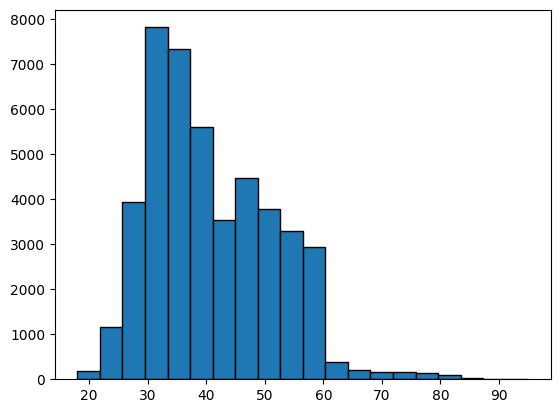

In [50]:
plt.hist(df['age'], bins= 20, edgecolor= 'k', alpha = 1.0)

(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

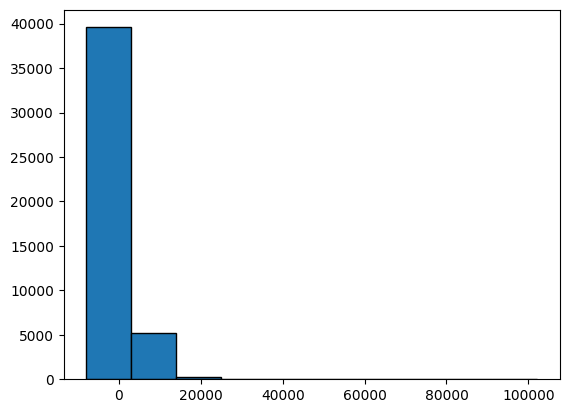

In [68]:
plt.hist(df['balance'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([1615., 1079., 3355., 1932., 3659., 1561., 2003., 1603., 3433.,
        1703., 3354., 2308., 4509., 2026., 1844.,  447., 1875., 1121.,
        3575., 2209.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ,
        17.5, 19. , 20.5, 22. , 23.5, 25. , 26.5, 28. , 29.5, 31. ]),
 <BarContainer object of 20 artists>)

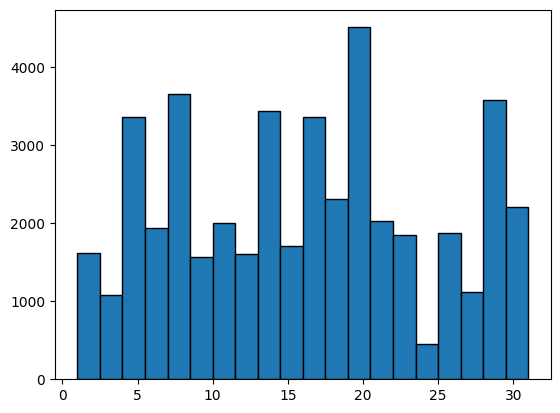

In [52]:
plt.hist(df['day'], bins= 20, edgecolor= 'k', alpha = 1.0)

(array([3.9677e+04, 4.4250e+03, 8.6500e+02, 1.7600e+02, 4.3000e+01,
        1.1000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

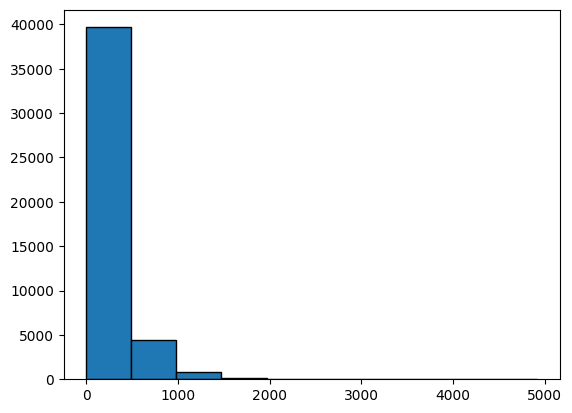

In [66]:
plt.hist(df['duration'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([4.2882e+04, 1.6220e+03, 4.2000e+02, 1.6500e+02, 7.5000e+01,
        3.3000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

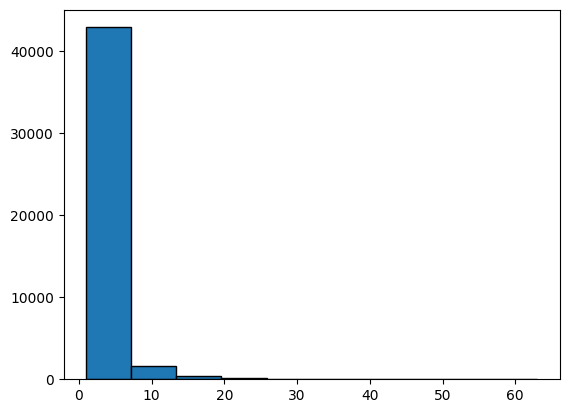

In [65]:
plt.hist(df['campaign'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([38940.,  1510.,   976.,   749.,  1056.,  1368.,   378.,    97.,
           75.,    62.]),
 array([  0. ,  55.8, 111.6, 167.4, 223.2, 279. , 334.8, 390.6, 446.4,
        502.2, 558. ]),
 <BarContainer object of 10 artists>)

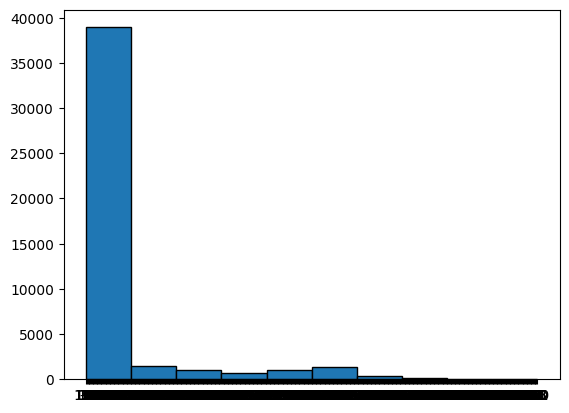

In [95]:
plt.hist(df['pdays'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([4.5208e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,  55., 110., 165., 220., 275.]),
 <BarContainer object of 5 artists>)

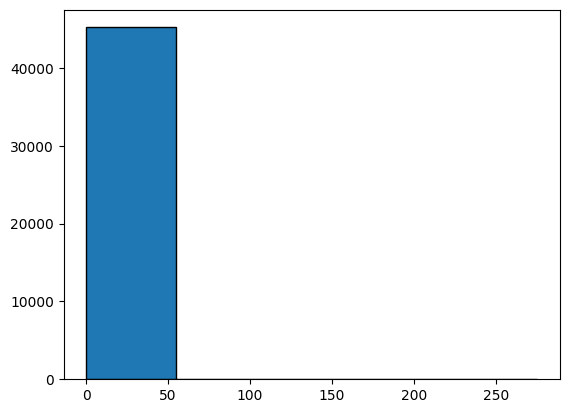

In [62]:
plt.hist(df['previous'], bins= 5, edgecolor= 'k', alpha = 1.0)

In [71]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


<Axes: xlabel='count', ylabel='marital'>

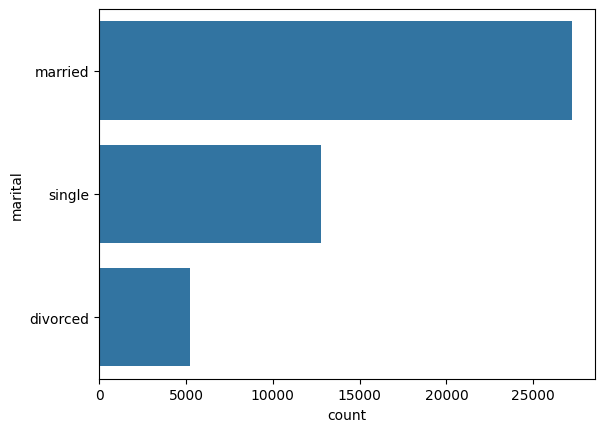

In [76]:
sns.countplot(df['marital'])

<Axes: xlabel='count', ylabel='education'>

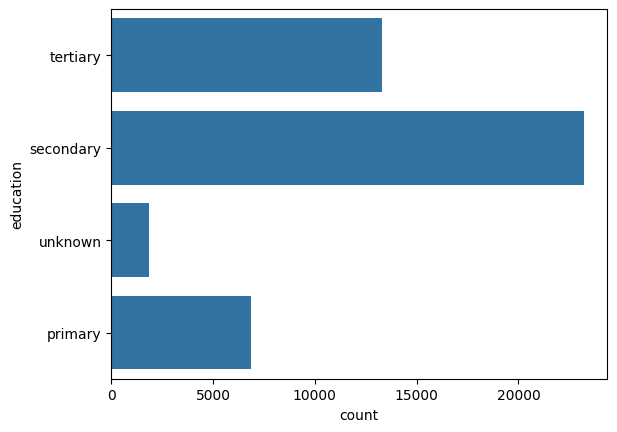

In [78]:
sns.countplot(df['education'])

<Axes: xlabel='count', ylabel='default'>

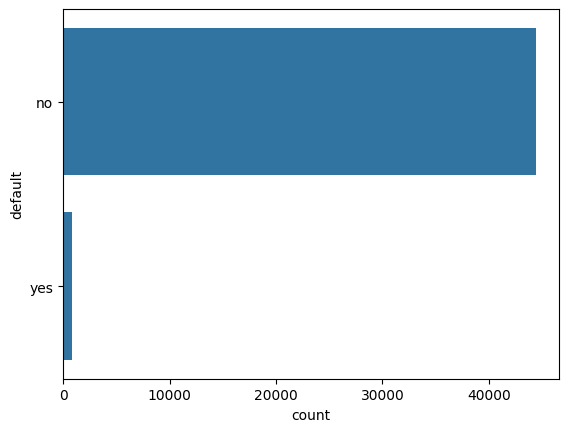

In [79]:
sns.countplot(df['default'])

<Axes: xlabel='count', ylabel='housing'>

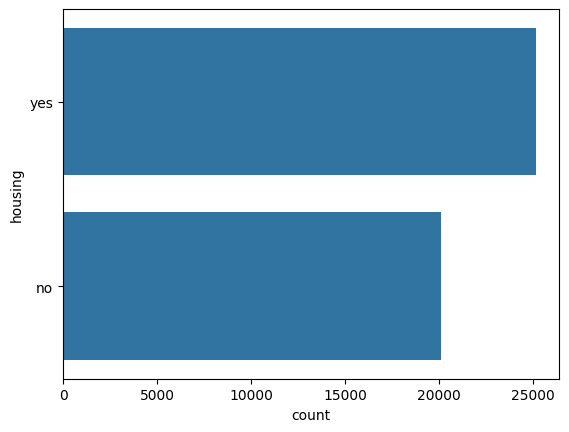

In [80]:
sns.countplot(df['housing'])

<Axes: xlabel='count', ylabel='loan'>

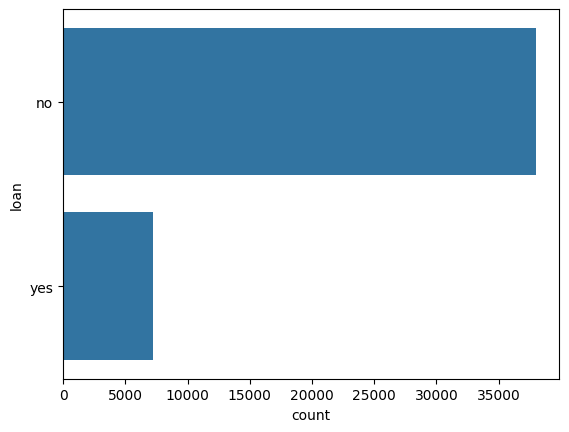

In [81]:
sns.countplot(df['loan'])

<Axes: xlabel='count', ylabel='contact'>

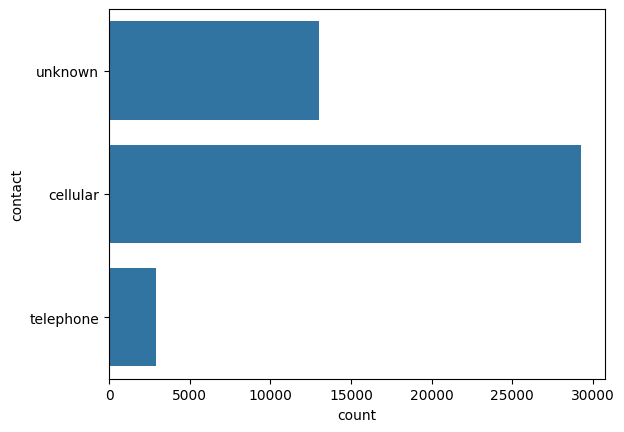

In [82]:
sns.countplot(df['contact'])

<Axes: xlabel='count', ylabel='month'>

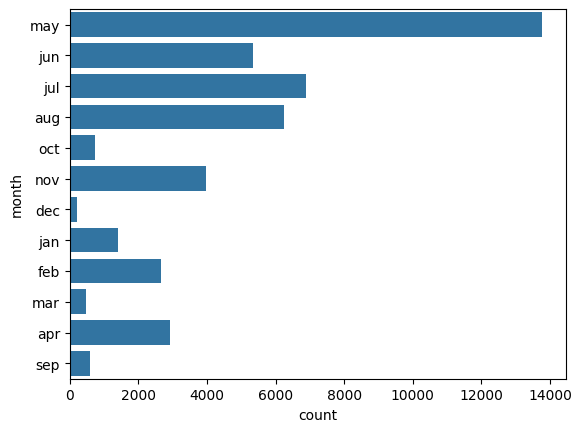

In [83]:
sns.countplot(df['month'])